# Capstone Project
## Machine Learning Engineer Nanodegree
```
Miroslav Karpis (miroslav.karpis@gmail.com)
August 5th 2016
```

## I. Definition
> _(approx. 1-2 pages)_

### Project Overview

> In this section, look to provide a high-level overview of the project in layman’s terms. Questions to ask yourself when writing this section:
- _Has an overview of the project been provided, such as the problem domain, project origin, and related datasets or input data?_
- _Has enough background information been given so that an uninformed reader would understand the problem domain and following problem statement?_


Goal of this project is to build a proof of concept for social image description platform using deep learning. Users can upload an image that they would like to have described, the image is then surfaced in other users’ streams and one or more users describe it. Over time, the system learns associations between words used to describe an image and the visual features found in it, and gets better at predicting descriptions on its own. Additionally will be the platform also trained with currently available labeled images (for example Flickr8, Flickr30).

For a human it takes very little time to recognize, categorize and correctly name an object from an image. For a computer this problem is much more complicated, because of the objects can be for example rotated, have different sizes, colors or can be partially hiding another object. Currently one of the most used technique for identifying objects from images is deep learning. 

With this project the author will try to broader his knowledge within this field and create an application that can be used in different fields. As an example below are some possible use-cases, where the application could be beneficial:
* **Object description for blind people**: Blind person will hold a phone camera which will send facing image to the projects server, and say aloud objects that are in front of the person.

* **Translator**: User will take a picture of an object and the application will return name of the object in selected language (or several languages).


### Problem Statement
>In this section, you will want to clearly define the problem that you are trying to solve, including the strategy (outline of tasks) you will use to achieve the desired solution. You should also thoroughly discuss what the intended solution will be for this problem. Questions to ask yourself when writing this section:
- _Is the problem statement clearly defined? Will the reader understand what you are expecting to solve?_
- _Have you thoroughly discussed how you will attempt to solve the problem?_
- _Is an anticipated solution clearly defined? Will the reader understand what results you are looking for?_

Application is a social image description platform, that will consists of following parts:
* User application / User interface

* Datastore

* Server application

<img src="images/kukuk_arch.png" width="600"/>
_Picture: High level system architecture and proposed technology._

#### User application / User interface
Users will interface social image description platform via mobile application. To achieve a cross-platform mobile application, for development is selected [Ionic platform](https://ionic.io). Ionic platform is a cross platform that contains all of the required functionalities for this project and good test environment. Application is coded in html5 so there will minimum work required to port the application to web application. 

The mobile application will have following main functionalities:
* Take a picture with camera and send it to server

* Receive returned labels for sent image

* Receive a list of non-labeled images

* Allow user to label and send to server received non-labeled images

* Planned but not guaranteed features

 * Play aloud name of the returned objects (Text to Speech)



To give a better idea about the project, below are some draft prototype images of the user mobile application interface.



<img src="images/proto_5.png" width="600"/>  


_Picture: On the left side is an user camera image together with object detection and their predicted labels. On the right side is a list of images that have been only label with machine learning algorithm and are waiting user feedback (approval)._


#### Datastore
All the images received from the users needs to be stored for immediate and future training purpose. Images will be transferred and stored as PNG format in a filesystem store. Below is a brief architecture diagram, which shows the main information data flow. 

As a programming language will be chosen Python 2.7 or above. Main reason for selecting Python as a programming language for the datastore communication application is a technical requirement from Udacity. As a database will be used sqlite for its simplicity and relatively fast implementation.

<p align="center">
<img src="images/kukuk_overall.png" width="560"/>
<p>

Picture 3: Basic User, server and datastore flow diagram


#### Server Application
Server application will be the main processing part, where most of the platforms logic will be implemented. The server will provide following services to the social image description platform:
* Communicate with mobile clients:

 * Receive image
 
 * Send labels for image
 
 * Send to client list of non-labeled images
 
 * Receive from clients labeled images
 
* Validate received image (validate if the resolution and image format are correct)

* Normalize received image

* Train machine learning model

* Query machine learning model with newly received image

* Query Datastore for image retrieval and storage

As a programming language will be chosen Python 2.7 or above. Main reason for selecting Python as a programming language for the datastore communication application is a technical requirement from Udacity and available machine learning libraries. For the machine learning library will be used [TensorFlow - Open Source Software Library for Machine Learning](https://www.tensorflow.org).


### Metrics
> In this section, you will need to clearly define the metrics or calculations you will use to measure performance of a model or result in your project. These calculations and metrics should be justified based on the characteristics of the problem and problem domain. Questions to ask yourself when writing this section:
- _Are the metrics you’ve chosen to measure the performance of your models clearly discussed and defined?_
- _Have you provided reasonable justification for the metrics chosen based on the problem and solution?_

To be able to measure the performance of our application we will group our measurement metrics into following groups:

1. **Measure performance of our trained model**: To be able to measure the accuracy of our trained model we will have available one of the feature of our application, where the users can receive a list of images with their predicted labels, and give them labels which user thinks are correct. With this functionality we will be able to randomly send to the social network also trained images and measure the occurrences when the user corrected the label. 
 
2. **Measure the performance of models training necessity to ask users to label images**

3. **Measure the performance of our data flow**: Important metric for our performance measurement will be the time between the moment when the sends image to the server and the time the user will receive reply from the server. 

As an additional metric for our model can be used results from similar commercial product from 
[clarifai](https://www.clarifai.com).


## II. Analysis
> _(approx. 2-4 pages)_

### Data Exploration

> In this section, you will be expected to analyze the data you are using for the problem. This data can either be in the form of a dataset (or datasets), input data (or input files), or even an environment. The type of data should be thoroughly described and, if possible, have basic statistics and information presented (such as discussion of input features or defining characteristics about the input or environment). Any abnormalities or interesting qualities about the data that may need to be addressed have been identified (such as features that need to be transformed or the possibility of outliers). Questions to ask yourself when writing this section:
- _If a dataset is present for this problem, have you thoroughly discussed certain features about the dataset? Has a data sample been provided to the reader?_
- _If a dataset is present for this problem, are statistics about the dataset calculated and reported? Have any relevant results from this calculation been discussed?_
- _If a dataset is **not** present for this problem, has discussion been made about the input space or input data for your problem?_
- _Are there any abnormalities or characteristics about the input space or dataset that need to be addressed? (categorical variables, missing values, outliers, etc.)_

Data used within the application can be divided into following groups

1. **Data used for model and system training:** Image data used during the model training and system optimization

2. **Image data from users:** Image data received from the user during the application life-cycle

3. **Post-trained image data:** New datasets that will be discovered after the model is trained. 


#### Data used for model and system training
Data that will be used for model training and also for testing the entire system architecture will be one of the most important element in our data exploration. 

For system architecture test it will be very important to monitor overall speed of the application flow - from the moment when user will send image to the server until the moment will receive labeled data back. 

Within this process will be included following major operations:
* Input image pre-processing

* Deep learning model application

* Response / Reply to clients application

All of these operations will need to be carefully tested, measured and analyzed for the sake of relatively fast and stable system (as mentioned earlier this is only proof of concept, where only limited processing resources are available).


Nowadays we have available many labeled image datasets that are available mostly for non-commercial research and/or educational purposes. For our training model, I will use data from following sources:

 * [flickr8k](https://illinois.edu/fb/sec/1713398) and [flickr30k](http://shannon.cs.illinois.edu/DenotationGraph/): The Flickr 8K dataset includes images obtained from the “flickr” website.
 
 * [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html): Dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
 
 * [Caltech 101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/): Pictures of objects belonging to 101 categories. About 40 to 800 images per category


#### Image data from users
Image data received from users will be forwarded to our labeling deep learning model, where the model will try to assign correct model. If the prediction probability will be small the image will be forwarded to _label queue_, where images will be sent to users and wait for their labeled feedback.

<p align="center">
<img src="images/image_queue_flow.png" width="560"/>
<p>

Picture 4: Simple data flow between the user input, our predictive social network and user labeling feedback.

#### Post-trained image data
Occasionally new datasets might be available to public. In those cases it could be useful to use these new datasets and feed our predictive network to enhance its prediction score.
 


### Exploratory Visualization
> In this section, you will need to provide some form of visualization that summarizes or extracts a relevant characteristic or feature about the data. The visualization should adequately support the data being used. Discuss why this visualization was chosen and how it is relevant. Questions to ask yourself when writing this section:
- _Have you visualized a relevant characteristic or feature about the dataset or input data?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_


Since the only data we have currently availble prior to application start are our datasets, the exploratory visualization will be focused to this dataset. As mentioned in our analysis section, we have available labeled image data from Flickr, CIFAR 10 and Caltech 101. Following section will explore and analyze these data sets.

#### CIFAR 100 dataset analysis

The CIFAR-100 dataset consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images.

In [277]:
# imports
%matplotlib inline
#import os
import numpy as np
import matplotlib.pyplot as plt 
#import matplotlib.colors as colors 
#import matplotlib.cm as cmx 
import cPickle
from random import randint
from libs import utils, gif

plt.style.use('ggplot')


def load_label_names(file):
    # unpickle from file
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict['fine_label_names']
    

def load_cifar(file):
    # unpickle from file
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    
    # parse dictionary data
    imgs_flat = dict['data']
    #print "imgs_flat:", type(imgs_flat)
    #print "imgs_flat:", imgs_flat.shape

    imgs = [x.reshape(3,32,32).transpose(1,2,0) for x in imgs_flat]
    #print "imgs:", type(imgs)
    #print "imgs[]:", type(imgs[5])
    
    labels = dict['fine_labels']
    #print 'number of img elements:', str(len(imgs))
    #print 'number of labels:', str(len(labels))     
    return imgs, labels


label_names = load_label_names('../data/cifar_100/meta')
X_train, y_train = load_cifar('../data/cifar_100/train')
X_test, y_test = load_cifar('../data/cifar_100/test')

X_c100 = X_train + X_test
y_c100 = y_train + y_test


print 'Total classes:', len(label_names)
print 'Total samples:', len(X_c100)
print 'Total labels:', len(y_c100)


Total classes: 100
Total samples: 60000
Total labels: 60000


Images labels: ['rocket', 'bridge', 'tractor', 'oak_tree', 'house', 'kangaroo', 'flatfish', 'crab', 'elephant', 'cloud', 'streetcar', 'pine_tree', 'bridge', 'plate', 'sunflower', 'television', 'raccoon', 'palm_tree', 'seal', 'mushroom', 'cloud', 'shrew', 'orchid', 'lobster', 'castle']


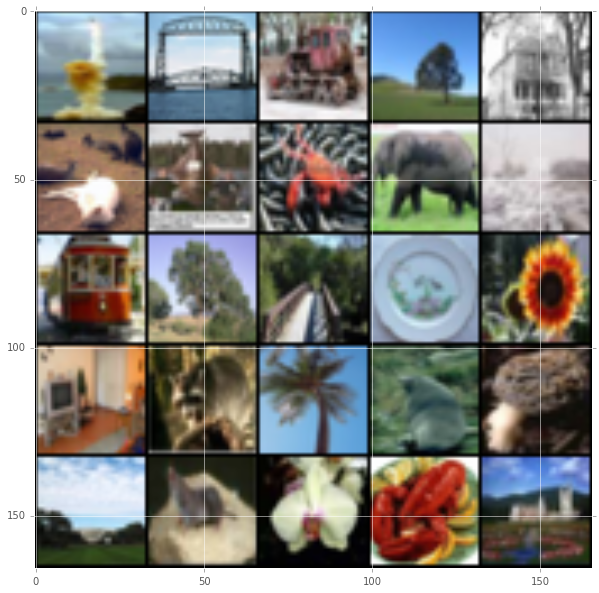

In [212]:
rnd_indxs = [randint(0, len(X_c100)) for i in range(25)]
#rnd_indxs = [i for i in range(25)]
rnd_imgs = [X_c100[x] for x in rnd_indxs]
rnd_label_idxs = [y_c100[x] for x in rnd_indxs]
rnd_labels = [labels[x] for x in rnd_label_idxs]

plt.figure(figsize=(10, 10)) 
plt.imshow(utils.montage(rnd_imgs).astype(np.uint8))

print 'Images labels:', rnd_labels

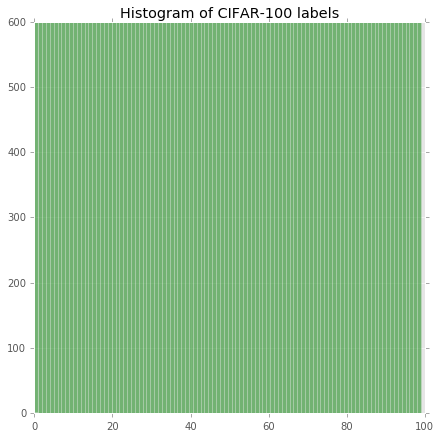

In [374]:
#print y_train
plt.figure(figsize=(7, 7)) 

#bins = np.arange(min(y_c100), max(y_c100))
plt.hist(y_c100, len(label_names), facecolor='green', alpha=0.5)
plt.title(r'Histogram of CIFAR-100 labels')
plt.show()

From the above histogram, we can see that our CIFAR 100 data are uniformly distributed along our 100 label classes.

**CIFAR 100 exploration summary:**

* The dataset contains 60000 32x32 pixel images and corresponding labels.
* Images are grouped into 100 labels
* The data are uniformly distributed along our 100 label classes


#### FLICKR 30k dataset analysys

-------------

# TODO

-------------



### Algorithms and Techniques
> In this section, you will need to discuss the algorithms and techniques you intend to use for solving the problem. You should justify the use of each one based on the characteristics of the problem and the problem domain. Questions to ask yourself when writing this section:
- _Are the algorithms you will use, including any default variables/parameters in the project clearly defined?_
- _Are the techniques to be used thoroughly discussed and justified?_
- _Is it made clear how the input data or datasets will be handled by the algorithms and techniques chosen?_

### Benchmark
> In this section, you will need to provide a clearly defined benchmark result or threshold for comparing across performances obtained by your solution. The reasoning behind the benchmark (in the case where it is not an established result) should be discussed. Questions to ask yourself when writing this section:
- _Has some result or value been provided that acts as a benchmark for measuring performance?_
- _Is it clear how this result or value was obtained (whether by data or by hypothesis)?_



Build a social image description platform. Users can upload an image that they would like to have described, the image is then surfaced in other users’ streams and one or more users describe it. Over time, the system learns associations between words used to describe an image and the visual features found in it, and gets better at predicting descriptions on its own.
You can use one of (or a combination of) several different methods to gather features from images, including (but not limited to):
Visual Bag of Words
Gist
SIFT, SURF or other local feature descriptors
Shape Context
For labeling, you can treat a description as a simple bag-of-words. A more advanced model could parse the description string entered by a user to understand sentence structure and semantics, and later generate descriptions that sound natural.

Choose a target platform (desktop/web/Android/iOS), and design your overall application. Describe it as if you are building a proof-of-concept product, complete with user interface design (very simple mockups will do), intended scope, features.
Explain clearly the computer vision/machine learning component within your application, including the inputs, desired outputs and some algorithms that you are considering.
Build the user-facing of the system first, including a means to upload an image, show unlabeled images in a user’s stream/homepage, and store descriptions that are entered.
Add screenshots of the system to your report explain usage scenarios and flows.
Prepare a dataset for training and testing, so that you can repeatedly (and reliably) measure the performance of your system. You can use the system built so far to generate this dataset (perhaps with some help from your friends?!).
Include statistics about your dataset in the report (no. of image, train-test split, etc.).
Now implement and test your image-description matching algorithm.
What computer vision and/or machine learning techniques did you use? What metric are you using to compare the predicted descriptions with the human-labeled ones?
Complete and improve your application by implementing any additional features.
What does your final system do, and how different is it from the system you initially conceived? How well does it perform on seen vs. unseen examples?







## III. Methodology
_(approx. 3-5 pages)_

### Data Preprocessing
In this section, all of your preprocessing steps will need to be clearly documented, if any were necessary. From the previous section, any of the abnormalities or characteristics that you identified about the dataset will be addressed and corrected here. Questions to ask yourself when writing this section:
- _If the algorithms chosen require preprocessing steps like feature selection or feature transformations, have they been properly documented?_
- _Based on the **Data Exploration** section, if there were abnormalities or characteristics that needed to be addressed, have they been properly corrected?_
- _If no preprocessing is needed, has it been made clear why?_

### Implementation
In this section, the process for which metrics, algorithms, and techniques that you implemented for the given data will need to be clearly documented. It should be abundantly clear how the implementation was carried out, and discussion should be made regarding any complications that occurred during this process. Questions to ask yourself when writing this section:
- _Is it made clear how the algorithms and techniques were implemented with the given datasets or input data?_
- _Were there any complications with the original metrics or techniques that required changing prior to acquiring a solution?_
- _Was there any part of the coding process (e.g., writing complicated functions) that should be documented?_

### Refinement
In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:
- _Has an initial solution been found and clearly reported?_
- _Is the process of improvement clearly documented, such as what techniques were used?_
- _Are intermediate and final solutions clearly reported as the process is improved?_


## IV. Results
_(approx. 2-3 pages)_

### Model Evaluation and Validation
In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- _Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?_
- _Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?_
- _Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?_
- _Can results found from the model be trusted?_

### Justification
In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:
- _Are the final results found stronger than the benchmark result reported earlier?_
- _Have you thoroughly analyzed and discussed the final solution?_
- _Is the final solution significant enough to have solved the problem?_


## V. Conclusion
_(approx. 1-2 pages)_

### Free-Form Visualization
In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:
- _Have you visualized a relevant or important quality about the problem, dataset, input data, or results?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_

### Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- _Have you thoroughly summarized the entire process you used for this project?_
- _Were there any interesting aspects of the project?_
- _Were there any difficult aspects of the project?_
- _Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?_

### Improvement
In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:
- _Are there further improvements that could be made on the algorithms or techniques you used in this project?_
- _Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?_
- _If you used your final solution as the new benchmark, do you think an even better solution exists?_




-----------

**Before submitting, ask yourself. . .**

- Does the project report you’ve written follow a well-organized structure similar to that of the project template?
- Is each section (particularly **Analysis** and **Methodology**) written in a clear, concise and specific fashion? Are there any ambiguous terms or phrases that need clarification?
- Would the intended audience of your project be able to understand your analysis, methods, and results?
- Have you properly proof-read your project report to assure there are minimal grammatical and spelling mistakes?
- Are all the resources used for this project correctly cited and referenced?
- Is the code that implements your solution easily readable and properly commented?
- Does the code execute without error and produce results similar to those reported?



### Citations and data sources:

* M. Hodosh, P. Young and J. Hockenmaier (2013) "Framing Image Description as a Ranking Task: Data, Models and Evaluation Metrics", Journal of Artificial Intelligence Research, Volume 47, pages 853-899 http://www.jair.org/papers/paper3994.html when discussing our results
* [Flickr8 Flickr30 datasets](http://cs.stanford.edu/people/karpathy/deepimagesent/)
